## Understanding the Data (EDA)

In [1]:
# imports
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import joblib


In [2]:
# Reading the data
raw_data=pd.read_csv('../data/creditcard.csv')
raw_data.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [3]:
# Gathering information about the data

raw_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Time    284807 non-null  float64
 1   V1      284807 non-null  float64
 2   V2      284807 non-null  float64
 3   V3      284807 non-null  float64
 4   V4      284807 non-null  float64
 5   V5      284807 non-null  float64
 6   V6      284807 non-null  float64
 7   V7      284807 non-null  float64
 8   V8      284807 non-null  float64
 9   V9      284807 non-null  float64
 10  V10     284807 non-null  float64
 11  V11     284807 non-null  float64
 12  V12     284807 non-null  float64
 13  V13     284807 non-null  float64
 14  V14     284807 non-null  float64
 15  V15     284807 non-null  float64
 16  V16     284807 non-null  float64
 17  V17     284807 non-null  float64
 18  V18     284807 non-null  float64
 19  V19     284807 non-null  float64
 20  V20     284807 non-null  float64
 21  V21     28

In [4]:
# Checking for the number of rows and columns

raw_data.shape

(284807, 31)

In [5]:
# Checking for null values

raw_data.isnull().sum()

Time      0
V1        0
V2        0
V3        0
V4        0
V5        0
V6        0
V7        0
V8        0
V9        0
V10       0
V11       0
V12       0
V13       0
V14       0
V15       0
V16       0
V17       0
V18       0
V19       0
V20       0
V21       0
V22       0
V23       0
V24       0
V25       0
V26       0
V27       0
V28       0
Amount    0
Class     0
dtype: int64

In [6]:
raw_data.columns

Index(['Time', 'V1', 'V2', 'V3', 'V4', 'V5', 'V6', 'V7', 'V8', 'V9', 'V10',
       'V11', 'V12', 'V13', 'V14', 'V15', 'V16', 'V17', 'V18', 'V19', 'V20',
       'V21', 'V22', 'V23', 'V24', 'V25', 'V26', 'V27', 'V28', 'Amount',
       'Class'],
      dtype='object')

##### The class column is the target variable. The other columns are the features. It will tell us if the transaction is fraudulent or not.

C:\Users\caaka\AppData\Local\Temp\ipykernel_15580\526217074.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='Class', data=raw_data, palette='pastel')


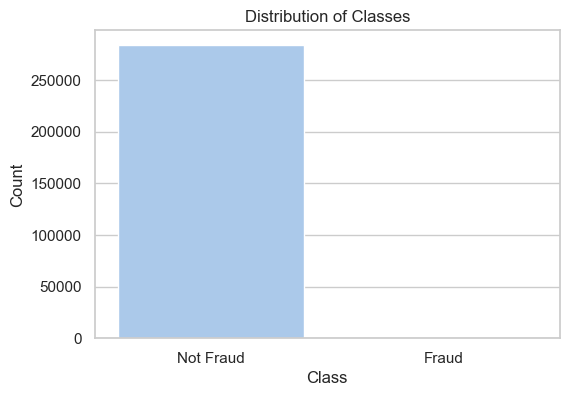

In [60]:
# Given class 1 is fraud and class 0 is not fraud, we can check the distribution of the classes
sns.set_theme(style="whitegrid")
plt.figure(figsize=(6, 4))
sns.countplot(x='Class', data=raw_data, palette='pastel')
plt.title('Distribution of Classes')
plt.xlabel('Class')
plt.ylabel('Count')
plt.xticks([0, 1], ['Not Fraud', 'Fraud'])
plt.savefig('../outputs/plots/class_distribution.png')
plt.show()

#### From the above graph we can see that the data is highly imbalanced. Let's check for the exact number of samples in each class.

In [8]:
# Class 0 and Class 1 % or count
print("Not Fraud Cases :", raw_data['Class'].value_counts()[0])
print("Fraud Cases :", raw_data['Class'].value_counts()[1])

print("Not Fraud Cases % :", (raw_data['Class'].value_counts()[0] / raw_data.shape[0]) * 100)
print("Fraud Cases % :", (raw_data['Class'].value_counts()[1] / raw_data.shape[0]) * 100)

Not Fraud Cases : 284315
Fraud Cases : 492
Not Fraud Cases % : 99.82725143693798
Fraud Cases % : 0.1727485630620034


#### The numbers make it even clearer that the data is highly imbalanced.

## Let's try to understand the relation between all the features and the target variable (Class) and among the features themselves.


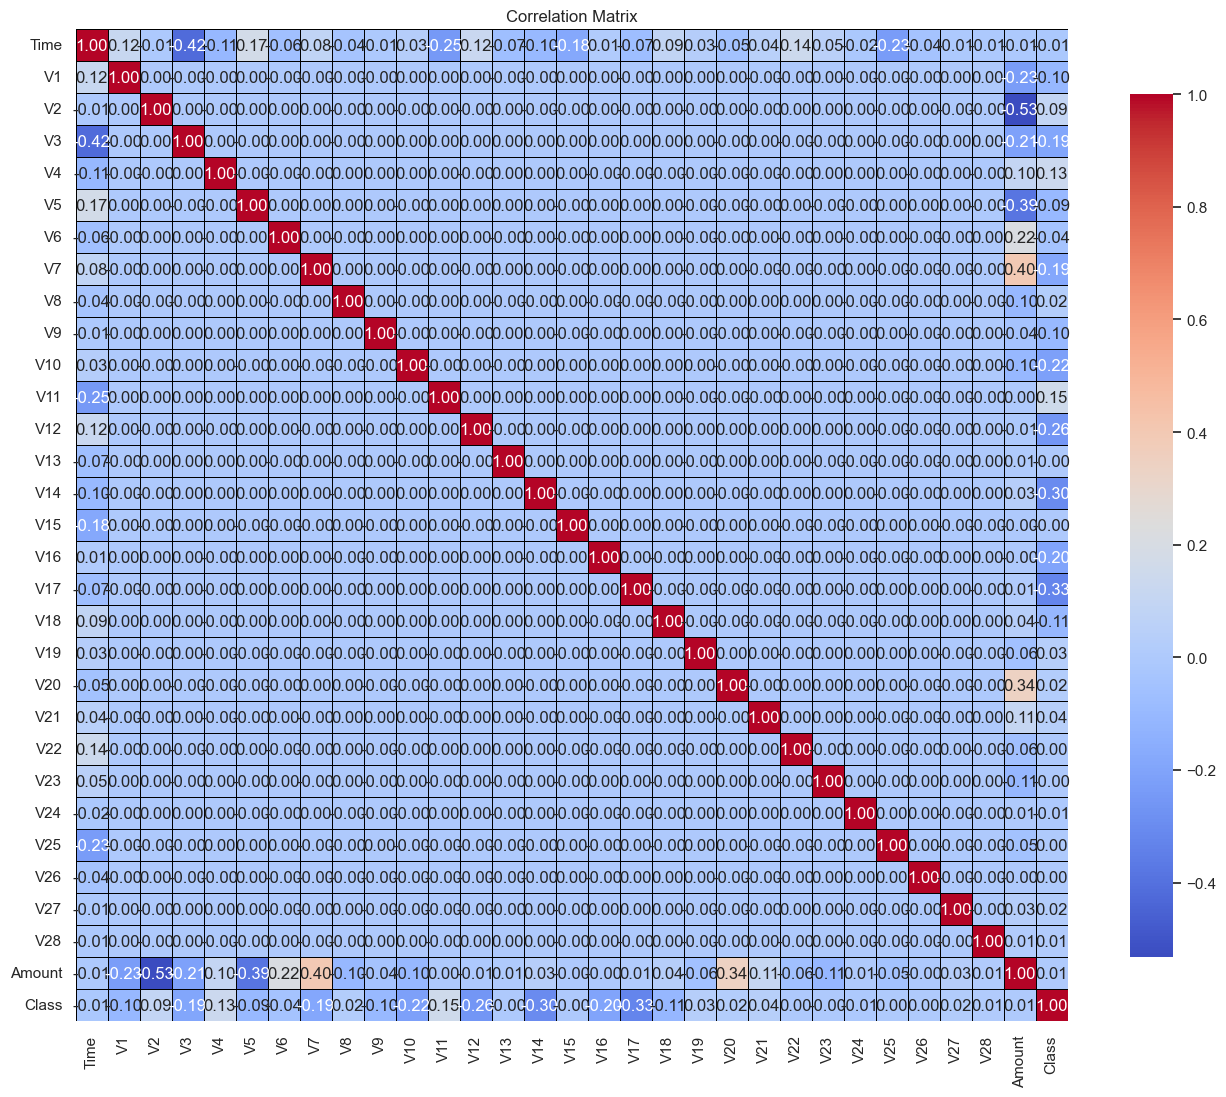

In [25]:
# Correlation matrix
corr=raw_data.corr()
sns.set_theme(style='white')
plt.figure(figsize=(16, 14))
sns.heatmap(corr, annot=True, fmt='.2f', cmap='coolwarm', square=True, cbar_kws={"shrink": .8}, linewidths=.5, linecolor='black')
plt.title('Correlation Matrix')
plt.savefig('../outputs/plots/correlation_matrix.png')
plt.show()



Let's pick out the features that are most correlated with the target variable (Class). By looking at the correlation matrix, we can make decent inferneces aboout which features affect the target variable the most.

Negaitive Correlation:
- v10: -0.22
- v12: -0.26
- v14: -0.30
- v16: -0.20
- v17: -0.33

Positive Correlation:
- v2: 0.09
- v4: 0.13
- v11: 0.15
- v18: 0.11

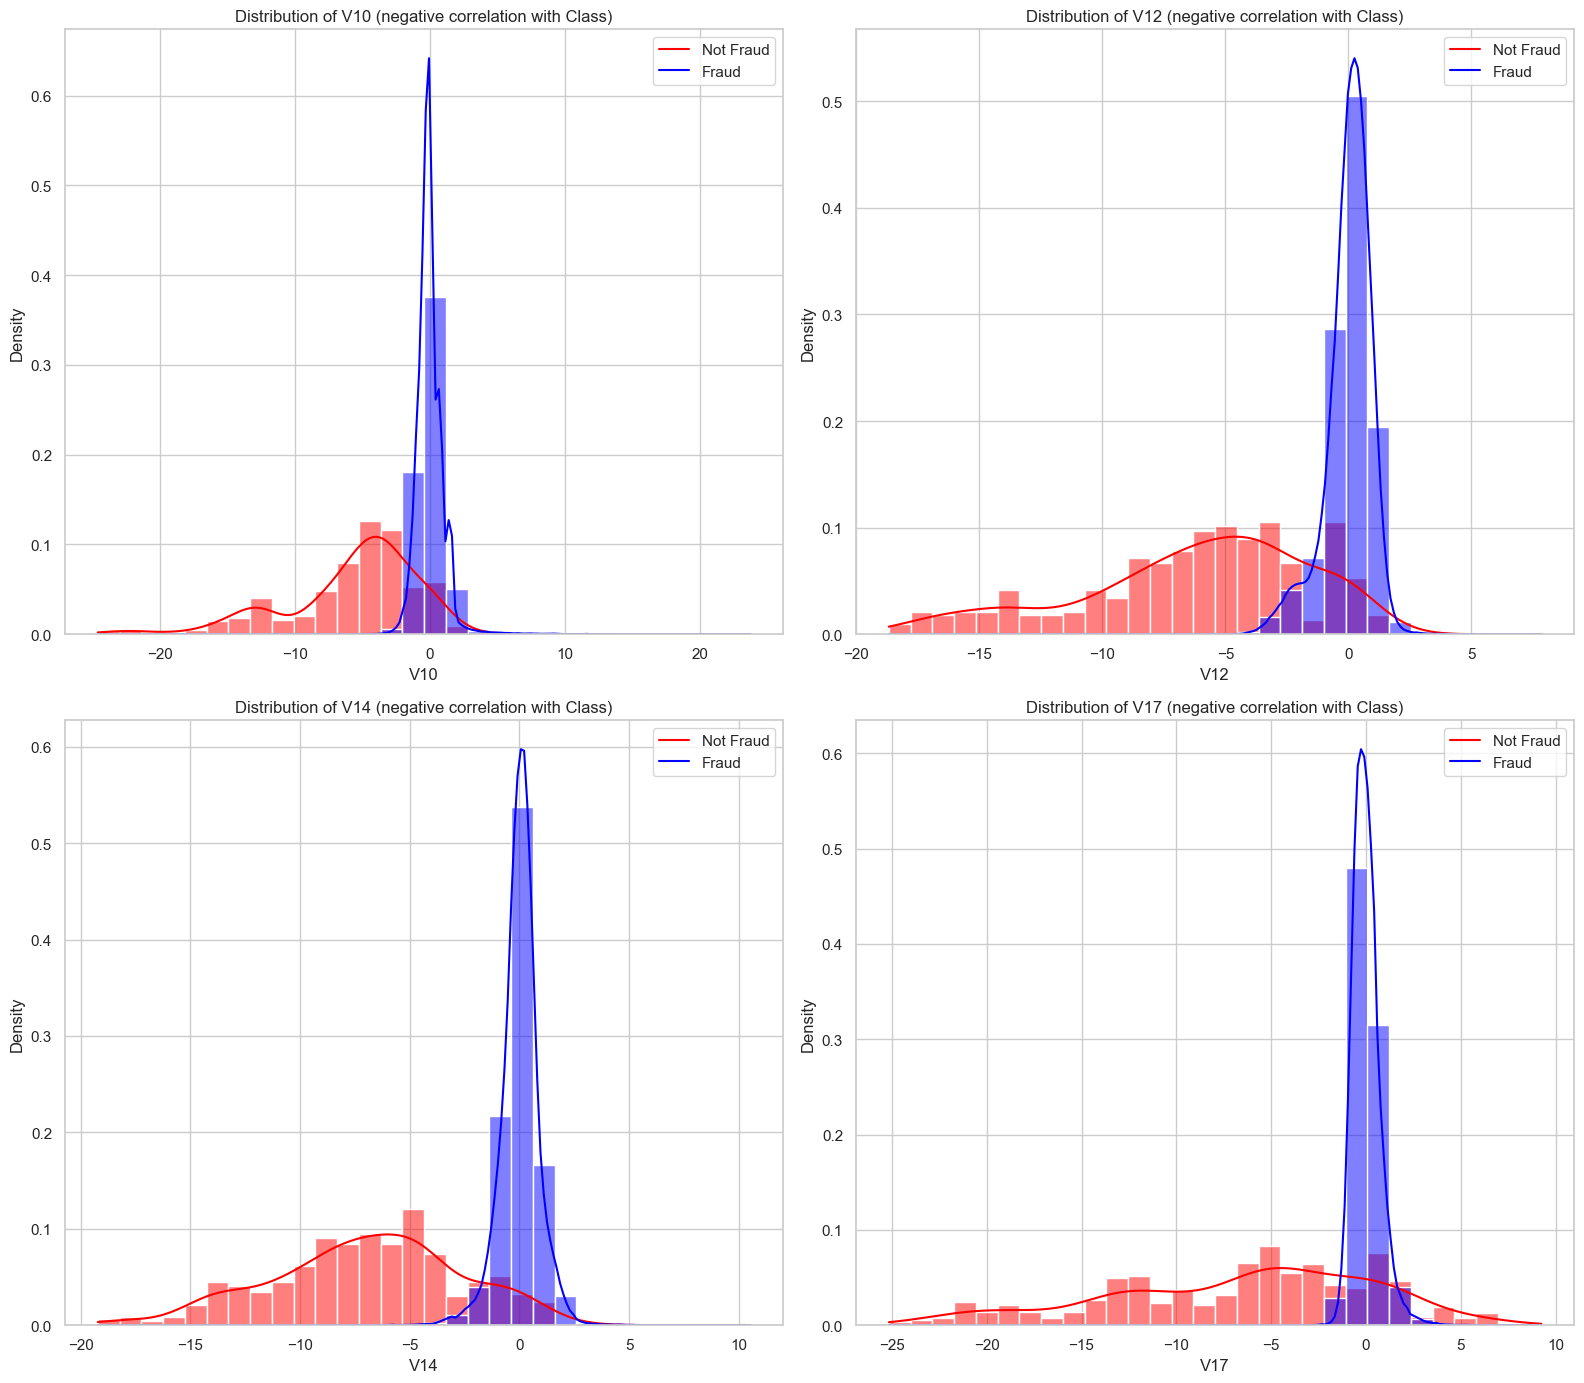

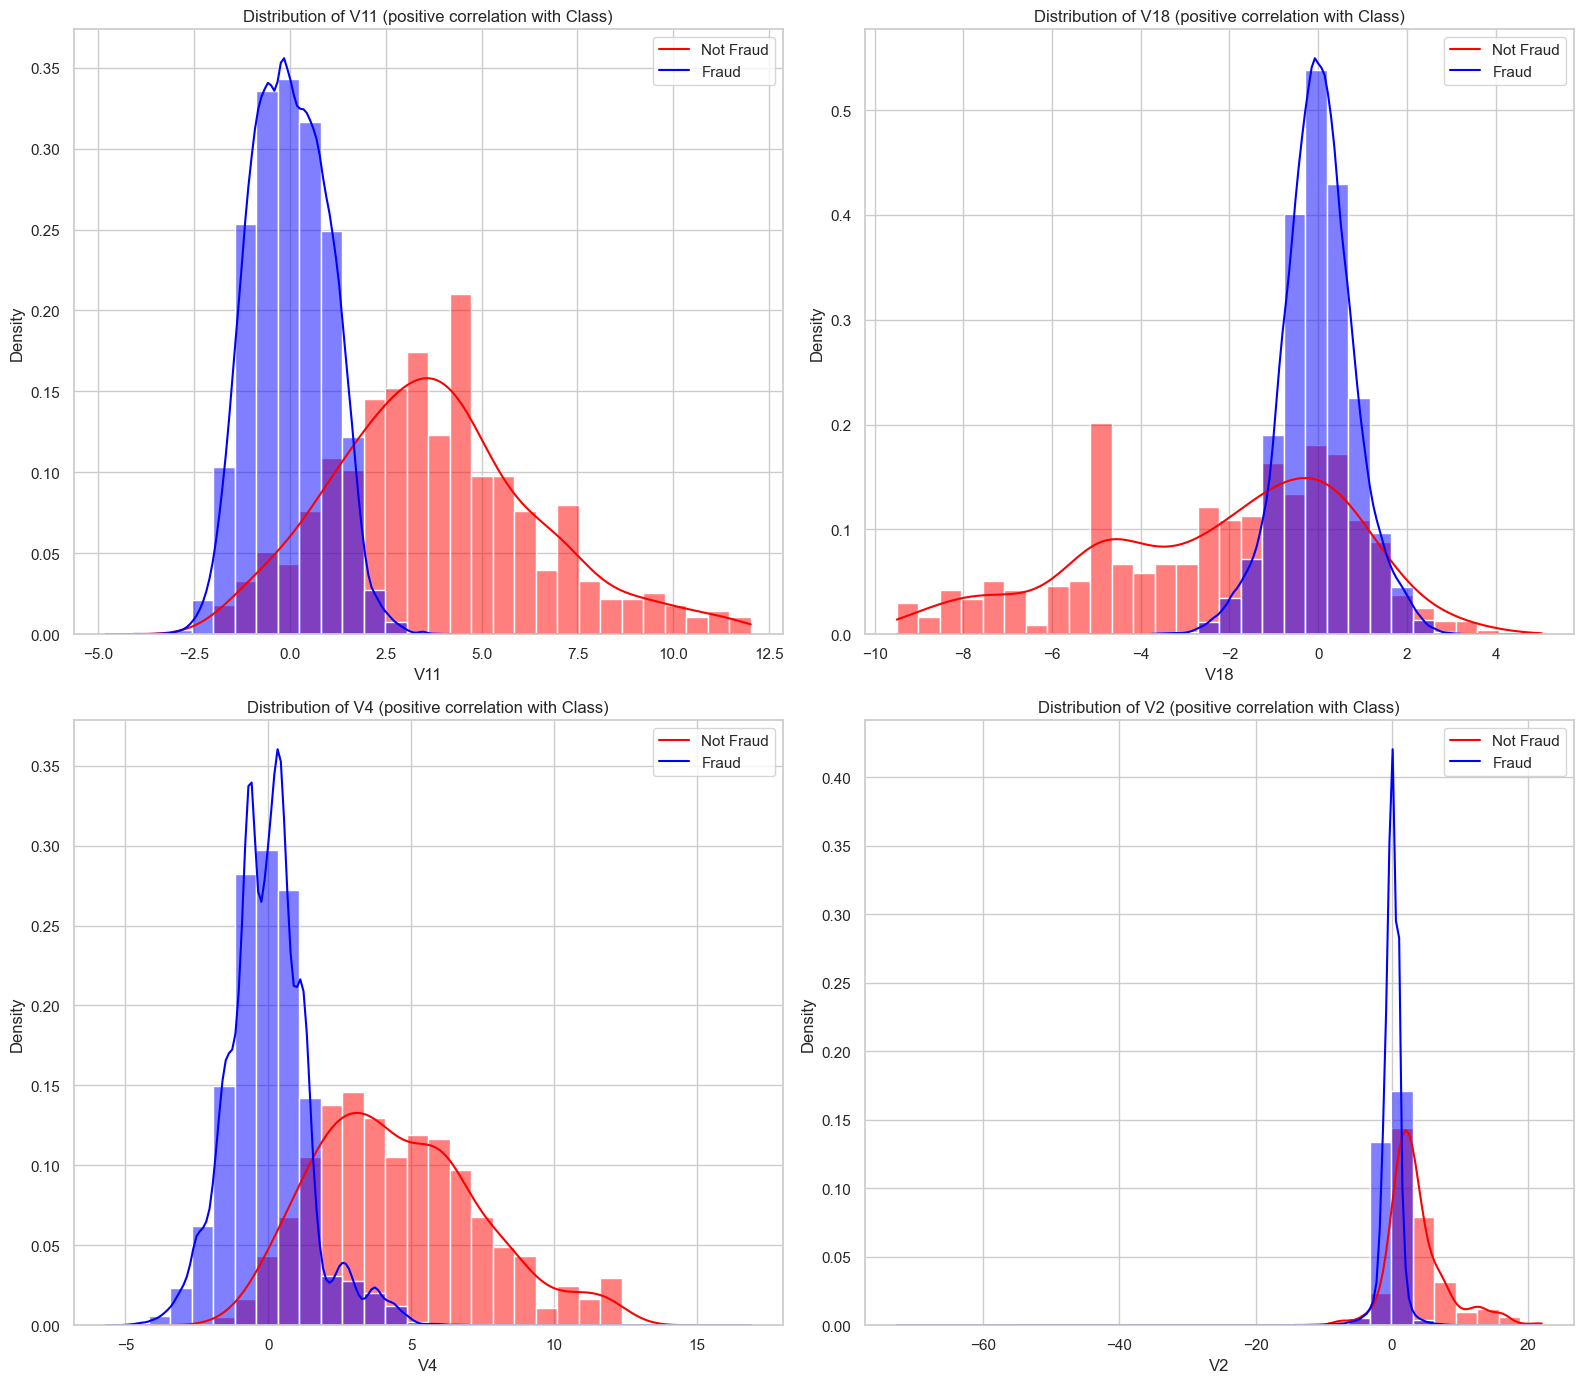

In [50]:
# Plotting distribution of the some of the selected features against class to see which affects the class most.
sns.set_theme(style='whitegrid')
plt.figure(figsize=(16, 14))

# Negative correlation with Class

plt.subplot(2, 2, 1)
sns.histplot(data=raw_data, x='V10', hue='Class', kde=True, stat='density', common_norm=False, bins=30, palette=['blue', 'red'])
plt.title('Distribution of V10 (negative correlation with Class)')
plt.xlabel('V10')
plt.ylabel('Density')
plt.legend(['Not Fraud', 'Fraud'])

plt.subplot(2, 2, 2)
sns.histplot(data=raw_data, x='V12', hue='Class', kde=True, stat='density', common_norm=False, bins=30, palette=['blue', 'red'])
plt.title('Distribution of V12 (negative correlation with Class)')
plt.xlabel('V12')
plt.ylabel('Density')
plt.legend(['Not Fraud', 'Fraud'])

plt.subplot(2, 2, 3)
sns.histplot(data=raw_data, x='V14', hue='Class', kde=True, stat='density', common_norm=False, bins=30, palette=['blue', 'red'])
plt.title('Distribution of V14 (negative correlation with Class)')
plt.xlabel('V14')
plt.ylabel('Density')
plt.legend(['Not Fraud', 'Fraud'])

plt.subplot(2, 2, 4)
sns.histplot(data=raw_data, x='V17', hue='Class', kde=True, stat='density', common_norm=False, bins=30, palette=['blue', 'red'])
plt.title('Distribution of V17 (negative correlation with Class)')
plt.xlabel('V17')
plt.ylabel('Density')
plt.legend(['Not Fraud', 'Fraud'])


plt.tight_layout()
plt.savefig('../outputs/plots/negative_correlation_distribution.png')
plt.show()

# Positive correlation with Class

sns.set_theme(style='whitegrid')
plt.figure(figsize=(16, 14))

plt.subplot(2, 2, 1)
sns.histplot(data=raw_data, x='V11', hue='Class', kde=True, stat='density', common_norm=False, bins=30, palette=['blue', 'red'])
plt.title('Distribution of V11 (positive correlation with Class)')
plt.xlabel('V11')
plt.ylabel('Density')
plt.legend(['Not Fraud', 'Fraud'])

plt.subplot(2, 2, 2)
sns.histplot(data=raw_data, x='V18', hue='Class', kde=True, stat='density', common_norm=False, bins=30, palette=['blue', 'red'])
plt.title('Distribution of V18 (positive correlation with Class)')
plt.xlabel('V18')
plt.ylabel('Density')
plt.legend(['Not Fraud', 'Fraud'])

plt.subplot(2, 2, 3)
sns.histplot(data=raw_data, x='V4', hue='Class', kde=True, stat='density', common_norm=False, bins=30, palette=['blue', 'red'])
plt.title('Distribution of V4 (positive correlation with Class)')
plt.xlabel('V4')
plt.ylabel('Density')
plt.legend(['Not Fraud', 'Fraud'])


plt.subplot(2, 2, 4)
sns.histplot(data=raw_data, x='V2', hue='Class', kde=True, stat='density', common_norm=False, bins=30, palette=['blue', 'red'])
plt.title('Distribution of V2 (positive correlation with Class)')
plt.xlabel('V2')
plt.ylabel('Density')
plt.legend(['Not Fraud', 'Fraud'])

plt.tight_layout()
plt.savefig('../outputs/plots/positive_correlation_distribution.png')
plt.show()

## From the above graphs we can deduce the following:
- Positive Correlation: The higher these values, the more likely the transaction is to be fraudulent.
- Negative Correlation: The lower these values, the more likely the transaction is to be fraudulent.

### Therefore the selected features contribute significantly to the target variable (Class).

Let's check the same with boxplots. The boxplots will help us visualize the distribution of the features with respect to the target variable (Class).

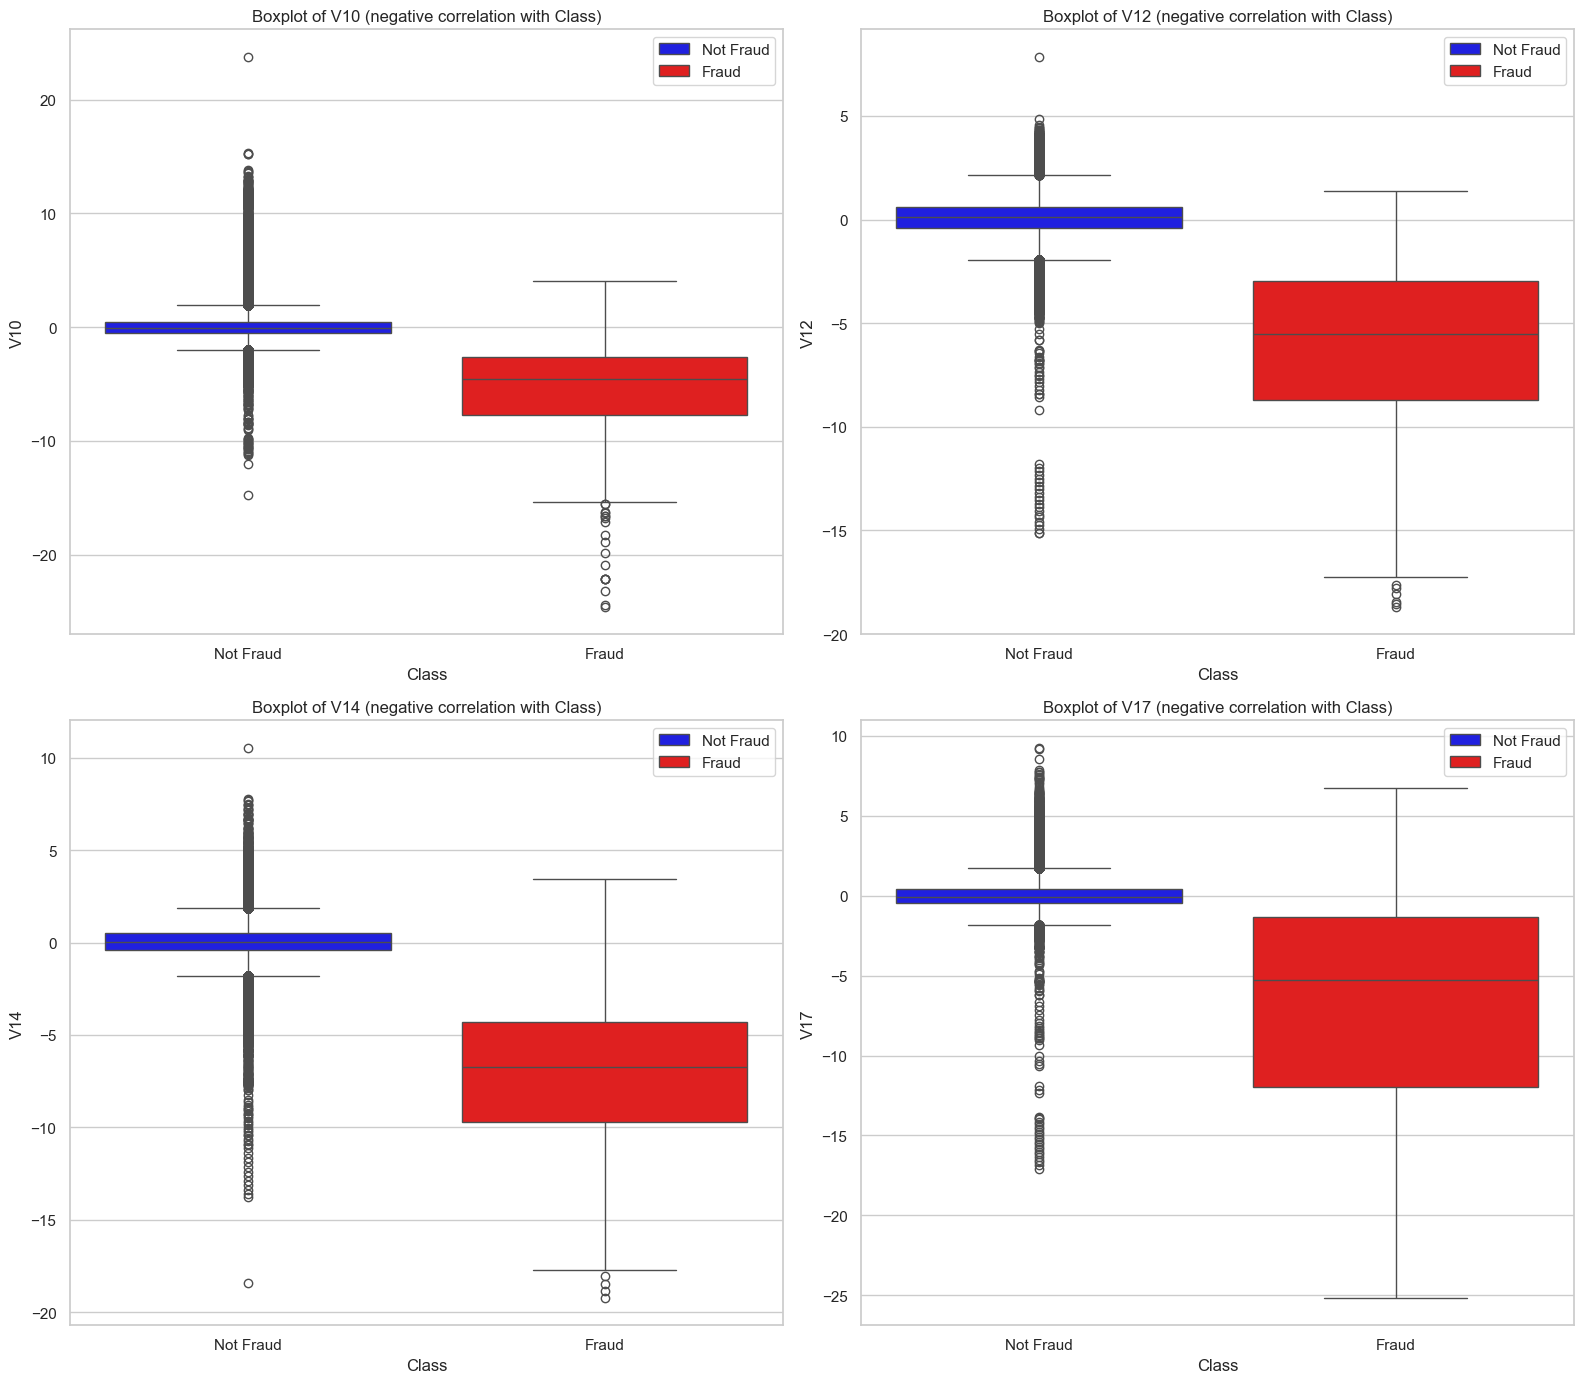

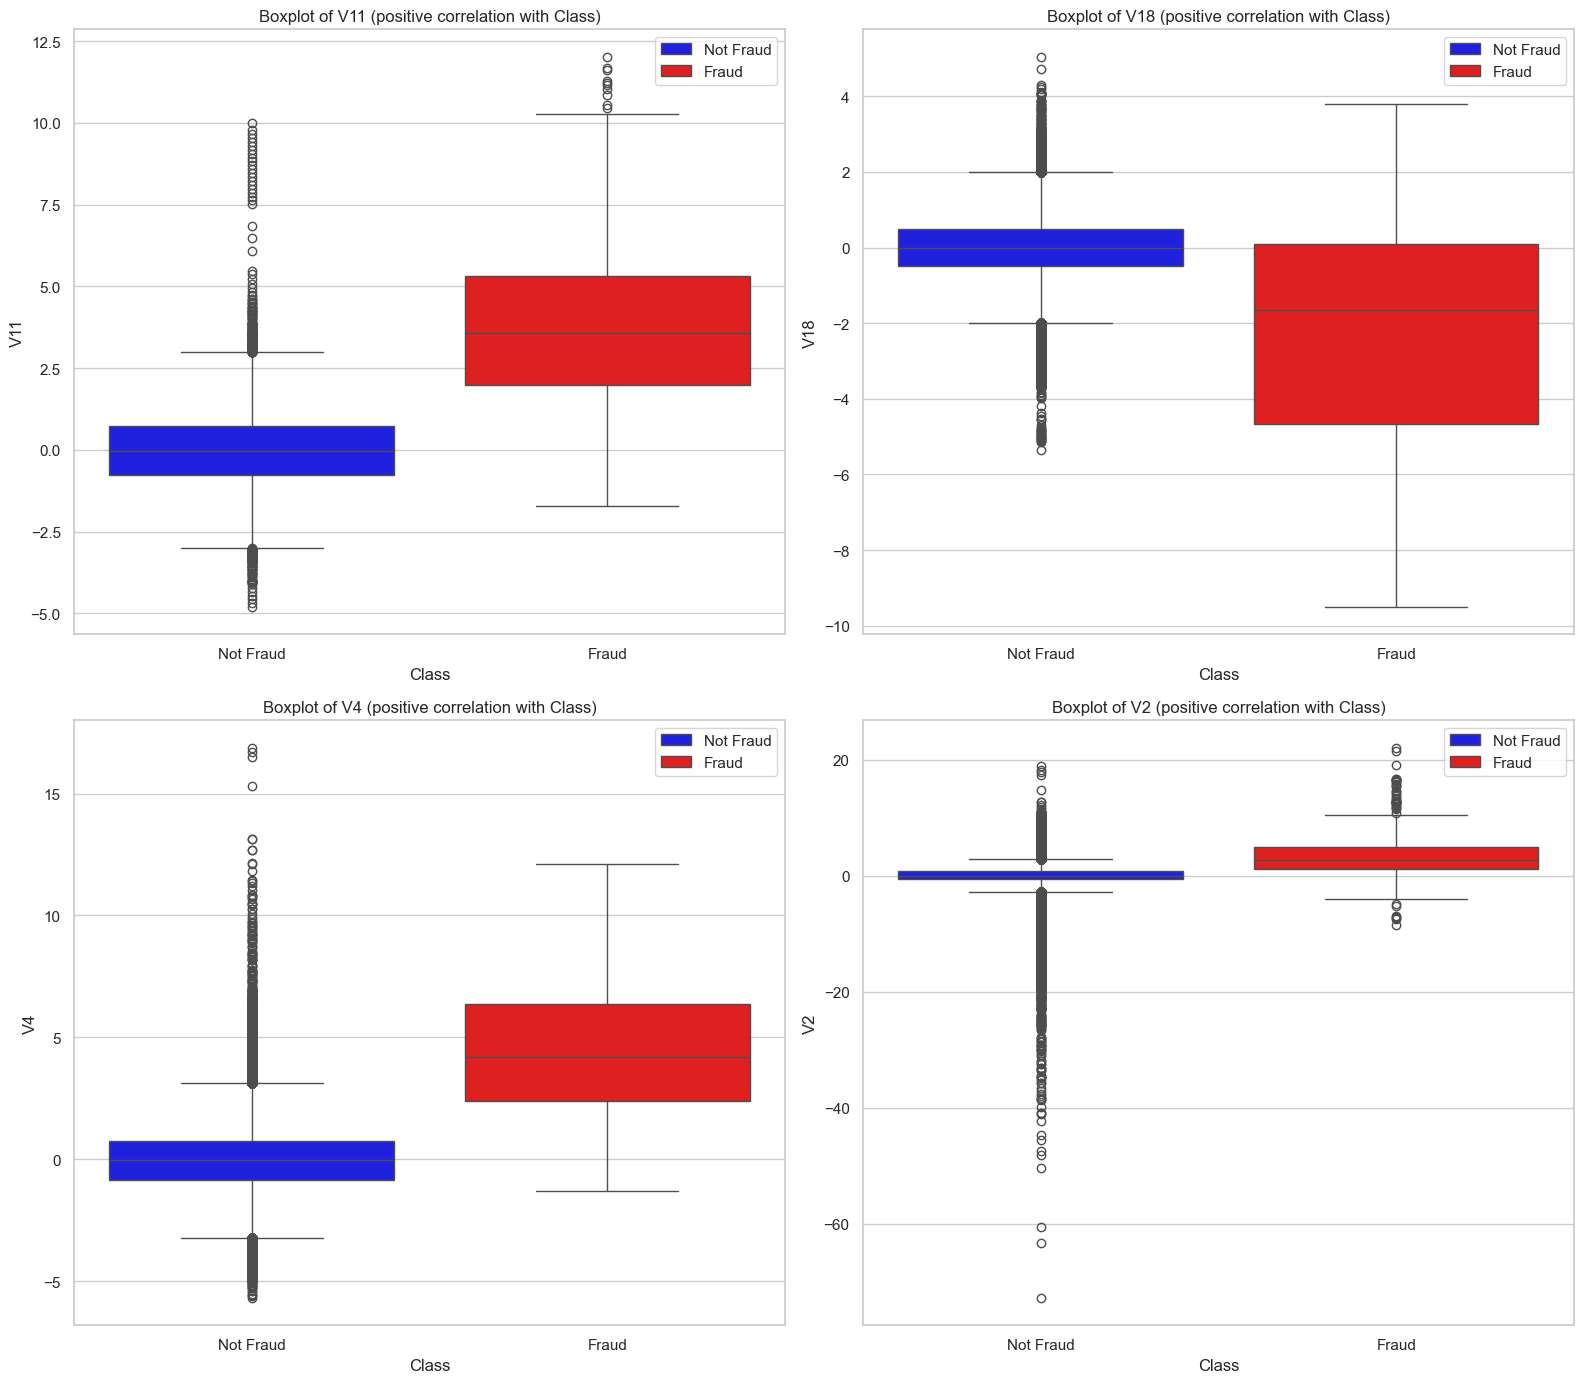

In [51]:
# Boxplot of the selected features against class to see which affects the class most.
sns.set_theme(style='whitegrid')
plt.figure(figsize=(16, 14))

plt.subplot(2, 2, 1)
sns.boxplot(data=raw_data, x='Class', y='V10', hue='Class', palette=['blue', 'red'])
plt.title('Boxplot of V10 (negative correlation with Class)')
plt.xlabel('Class')
plt.ylabel('V10')
plt.xticks([0, 1], ['Not Fraud', 'Fraud'])
plt.legend(['Not Fraud', 'Fraud'])

plt.subplot(2, 2, 2)
sns.boxplot(data=raw_data, x='Class', y='V12', hue='Class', palette=['blue', 'red'])
plt.title('Boxplot of V12 (negative correlation with Class)')
plt.xlabel('Class')
plt.ylabel('V12')
plt.xticks([0, 1], ['Not Fraud', 'Fraud'])
plt.legend(['Not Fraud', 'Fraud'])
    
plt.subplot(2, 2, 3)
sns.boxplot(data=raw_data, x='Class', y='V14', hue='Class', palette=['blue', 'red'])
plt.title('Boxplot of V14 (negative correlation with Class)')
plt.xlabel('Class')
plt.ylabel('V14')
plt.xticks([0, 1], ['Not Fraud', 'Fraud'])
plt.legend(['Not Fraud', 'Fraud'])

plt.subplot(2, 2, 4)
sns.boxplot(data=raw_data, x='Class', y='V17', hue='Class', palette=['blue', 'red'])
plt.title('Boxplot of V17 (negative correlation with Class)')
plt.xlabel('Class')
plt.ylabel('V17')
plt.xticks([0, 1], ['Not Fraud', 'Fraud'])
plt.legend(['Not Fraud', 'Fraud'])

plt.tight_layout()
plt.savefig('../outputs/plots/negative_correlation_boxplot.png')
plt.show()

# Boxplot of the selected features against class to see which affects the class most.
sns.set_theme(style='whitegrid')
plt.figure(figsize=(16, 14))


plt.subplot(2, 2, 1)
sns.boxplot(data=raw_data, x='Class', y='V11', hue='Class', palette=['blue', 'red'])
plt.title('Boxplot of V11 (positive correlation with Class)')
plt.xlabel('Class')
plt.ylabel('V11')
plt.xticks([0, 1], ['Not Fraud', 'Fraud'])
plt.legend(['Not Fraud', 'Fraud'])

plt.subplot(2, 2, 2)
sns.boxplot(data=raw_data, x='Class', y='V18', hue='Class', palette=['blue', 'red'])
plt.title('Boxplot of V18 (positive correlation with Class)')
plt.xlabel('Class')
plt.ylabel('V18')
plt.xticks([0, 1], ['Not Fraud', 'Fraud'])
plt.legend(['Not Fraud', 'Fraud'])

plt.subplot(2, 2, 3)
sns.boxplot(data=raw_data, x='Class', y='V4', hue='Class', palette=['blue', 'red'])
plt.title('Boxplot of V4 (positive correlation with Class)')
plt.xlabel('Class')
plt.ylabel('V4')
plt.xticks([0, 1], ['Not Fraud', 'Fraud'])
plt.legend(['Not Fraud', 'Fraud'])

plt.subplot(2, 2, 4)
sns.boxplot(data=raw_data, x='Class', y='V2', hue='Class', palette=['blue', 'red'])
plt.title('Boxplot of V2 (positive correlation with Class)')
plt.xlabel('Class')
plt.ylabel('V2')
plt.xticks([0, 1], ['Not Fraud', 'Fraud'])
plt.legend(['Not Fraud', 'Fraud'])

plt.tight_layout()
plt.savefig('../outputs/plots/positive_correlation_boxplot.png')
plt.show()

## From the above barplots it is indeed clear that:
- for negative correlation features, the lower the value, the more likely the transaction is to be fraudulent.
- for positive correlation features, the higher the value, the more likely the transaction is to be fraudulent.

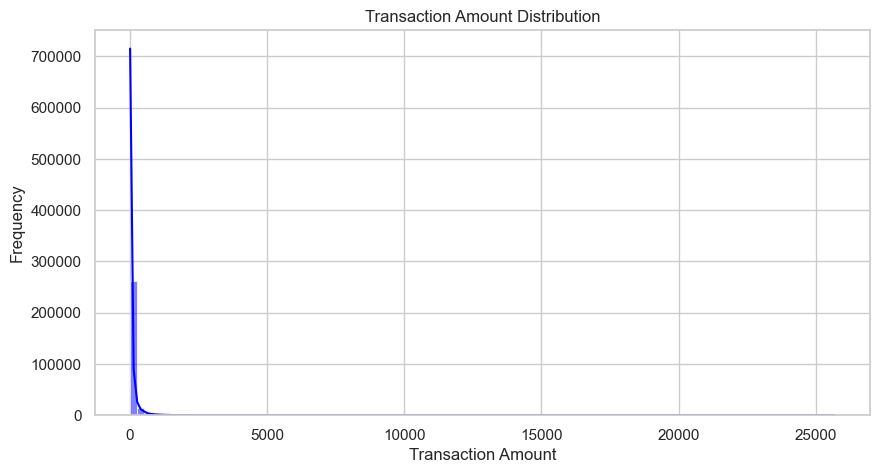

In [49]:
# Checking for skewness
# Transaction amount distribution graph
plt.figure(figsize=(10, 5))
sns.histplot(raw_data['Amount'], bins=100, kde=True, color='blue')
plt.title('Transaction Amount Distribution')
plt.xlabel('Transaction Amount')
plt.ylabel('Frequency')
plt.savefig('../outputs/plots/transaction_amount_distribution.png')
plt.show()


### From the above graph, we can deduce that the 'Transaction Amount' is rightly-skewed, i.e. positively skewed.

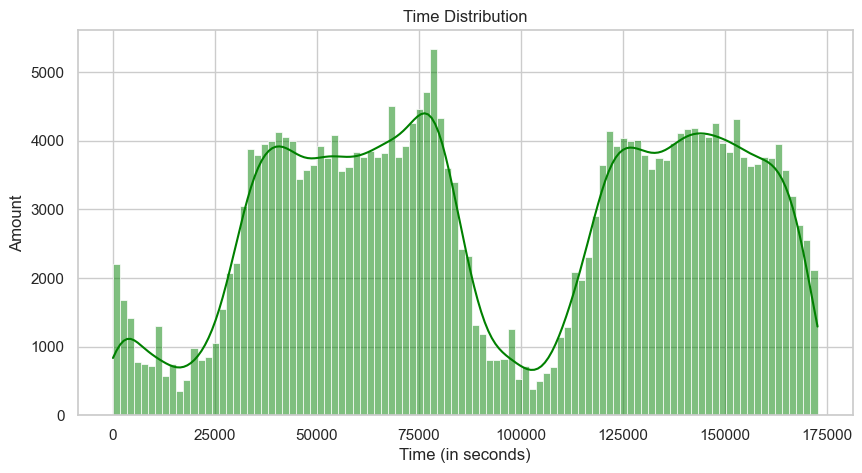

In [57]:
# Time distribution graph
plt.figure(figsize=(10, 5))
sns.histplot(raw_data['Time'], bins=100, kde=True, color='green')
plt.title('Time Distribution')
plt.xlabel('Time (in seconds)')
plt.ylabel('Amount')
plt.savefig('../outputs/plots/time_distribution.png')
plt.show()

C:\Users\caaka\AppData\Local\Temp\ipykernel_15580\1548391740.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(x='Class', y='Time', data=raw_data, palette='muted')


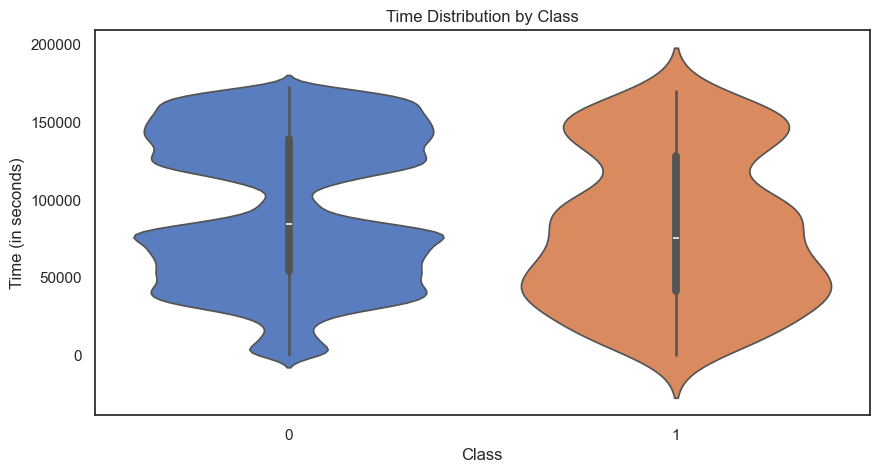

In [ ]:
# Violin plots for time amount and class
plt.figure(figsize=(10, 5))
sns.violinplot(x='Class', y='Time', hue='Class' data=raw_data, palette='muted')
plt.title('Time Distribution by Class')
plt.xlabel('Class')
plt.ylabel('Time (in seconds)')
plt.savefig('../outputs/plots/time_distribution_by_class.png')
plt.show()

### In the above graph, we can see that 'Class 1' has multimodal pattern (several peaks) indicating that more fradulent cases taking place at different intervals of time.

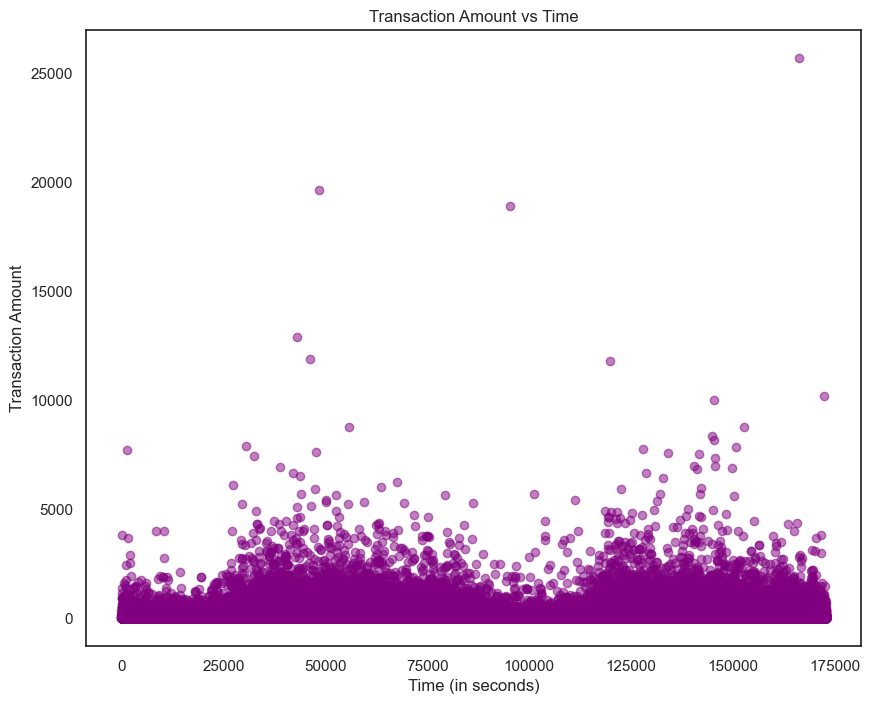

In [29]:
## Amount vs Time Graph
plt.figure(figsize=(10,8))
plt.scatter(raw_data['Time'], raw_data['Amount'], alpha=0.5, color='purple')
plt.title('Transaction Amount vs Time')
plt.xlabel('Time (in seconds)')
plt.ylabel('Transaction Amount')
plt.savefig('../outputs/plots/amount_vs_time.png')
plt.show()

##### From the above graph, we can tell that there weren't any huge transactions performed by the user (fraudulent or not). Most of the transactions are below 2000 indicating that the fraudulent-user was being very wary of his transactions. The same can be said for the non-fraudulent user. The only difference is that the fraudulent user made a few transactions above 2000. This indicates that the fraudulent user was trying to hide his transactions by making small transactions and then making a few big ones to make it look like he was not trying to hide anything.

<Figure size 1000x800 with 0 Axes>

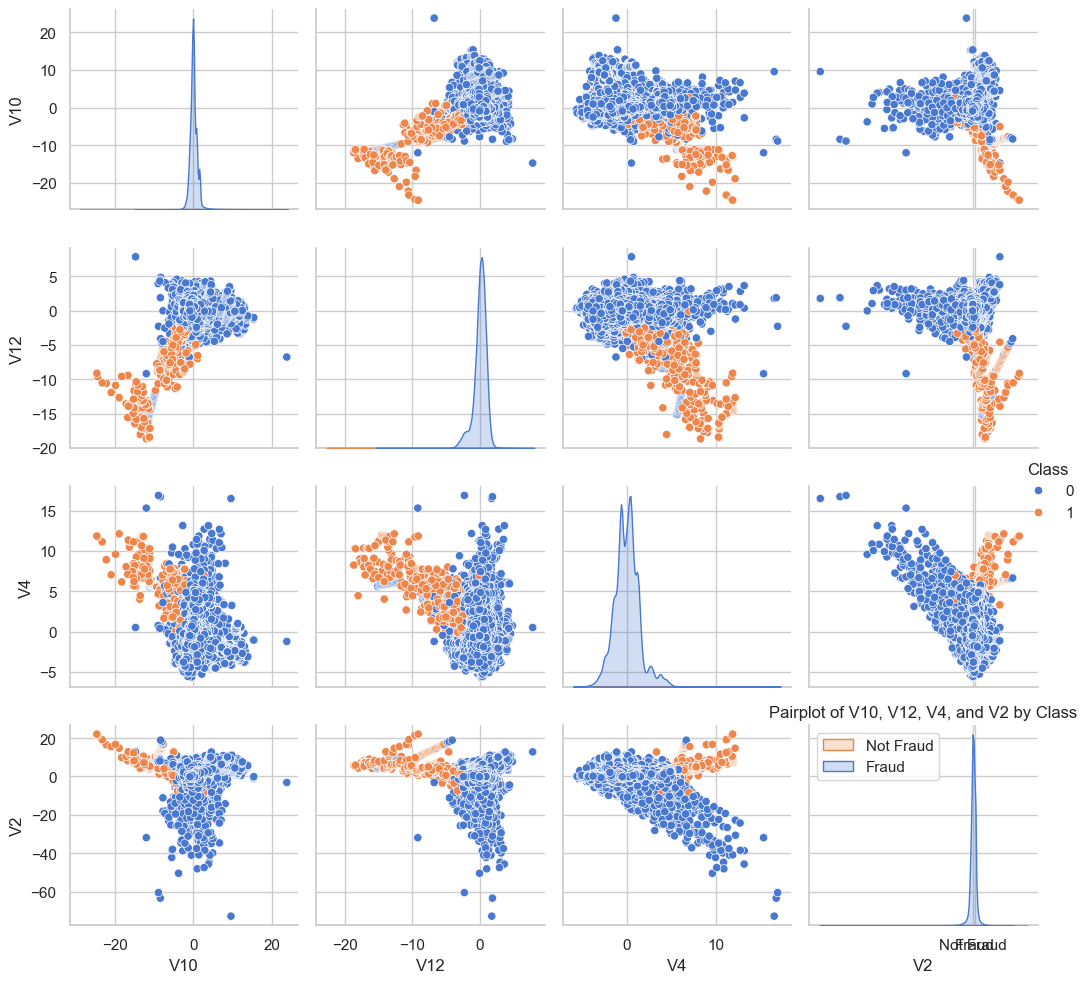

In [58]:
# pairplot for first 2 features with class
plt.figure(figsize=(10, 8))
sns.pairplot(raw_data[['V10', 'V12', 'V4', 'V2', 'Class']], hue='Class', palette='muted')
plt.title('Pairplot of V10, V12, V4, and V2 by Class')
plt.legend(['Not Fraud', 'Fraud'])
plt.xticks([0, 1], ['Not Fraud', 'Fraud'])
plt.tight_layout()
plt.savefig('../outputs/plots/pairplot.png')
plt.show()

## From the above pairplots we can confirm our deductions from the boxplots and correlation matrix. We can now proceed with te data preprocessing and handling class imbalance.

## Final Deductions:
- The data is highly imbalanced. We will need to use SMOTE or Sub-sampling methods to balance the data.
- The features that are most correlated with the target variable (Class) are v10, v12, v14, v16, v17, v2, v4, v11 and v18.
- The 'Transaction Amount' is rightly-skewed, i.e. positively skewed.
- The lower the value of the negative correlation features, the more likely the transaction is to be fraudulent.
- The higher the value of the positive correlation features, the more likely the transaction is to be fraudulent.